In [1]:
import pandas as pd
data=pd.read_csv('../input/co2-ghg-emissionsdata/co2_emission.csv')
data

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [2]:
data.rename(columns = {'Annual CO₂ emissions (tonnes )':'Annual_CO2_emissions_tonnes'},inplace =True)

# Understand the data

In [3]:
data['Annual_CO2_emissions_tonnes'].max()

36153261645.0

In [4]:
data['Annual_CO2_emissions_tonnes'].min()

-625522256.7

In [5]:
data=data[data['Annual_CO2_emissions_tonnes']>=0]
data.head()

,Entity,Code,Year,Annual_CO2_emissions_tonnes
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [6]:
data['Annual_CO2_emissions_tonnes'].min()

0.0

In [7]:
total_co2_emission= data['Annual_CO2_emissions_tonnes'].sum()
print("Total co2 emitted by all countries by 2017: ", total_co2_emission ,"tonnes")

Total co2 emitted by all countries by 2017:  4036305996933.6396 tonnes


# List of countries

In [8]:
countries=data['Entity'].unique().tolist()
countries

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Americas (other)',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctic Fisheries',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia and Pacific (other)',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Republic of the Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 'Democratic Republic of Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republi

In [9]:
missing_data=data.isnull()
missing_data

,Entity,Code,Year,Annual_CO2_emissions_tonnes
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
20848,False,False,False,False
20849,False,False,False,False
20850,False,False,False,False
20851,False,False,False,False


In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Entity
False    20813
Name: Entity, dtype: int64

Code
False    18646
True      2167
Name: Code, dtype: int64

Year
False    20813
Name: Year, dtype: int64

Annual_CO2_emissions_tonnes
False    20813
Name: Annual_CO2_emissions_tonnes, dtype: int64



# Remove column 'Code' 

In [11]:
data=data.drop(columns=['Code'], axis=1)
data

,Entity,Year,Annual_CO2_emissions_tonnes
0,Afghanistan,1949,14656.00
1,Afghanistan,1950,84272.00
2,Afghanistan,1951,91600.00
3,Afghanistan,1952,91600.00
4,Afghanistan,1953,106256.00
...,...,...,...
20848,Zimbabwe,2013,11536239.29
20849,Zimbabwe,2014,11866348.41
20850,Zimbabwe,2015,10907603.94
20851,Zimbabwe,2016,9932649.88


# Countrywise CO2 emission

In [12]:
countrywise=data[['Entity','Annual_CO2_emissions_tonnes']]
totalco2_countrywise=countrywise.groupby(['Entity'], as_index=False).sum()
totalco2_countrywise.head(10)

,Entity,Annual_CO2_emissions_tonnes
0,Afghanistan,1.785029e+08
1,Africa,4.311757e+10
2,Albania,2.772782e+08
3,Algeria,4.107870e+09
4,Americas (other),9.864116e+10
5,Andorra,1.371738e+07
6,Angola,6.237623e+08
7,Anguilla,3.040078e+06
8,Antarctic Fisheries,1.538880e+05
9,Antigua and Barbuda,2.175672e+07


In [13]:
totalco2_countrywise.describe()

,Annual_CO2_emissions_tonnes
count,2.330000e+02
mean,1.732320e+10
std,1.107848e+11
min,0.000000e+00
25%,3.528830e+07
50%,2.772782e+08
75%,3.016099e+09
max,1.575244e+12


In [14]:
mean_value=totalco2_countrywise['Annual_CO2_emissions_tonnes'].mean()
mean_value

17323201703.577847

# Top 10 over all emissions

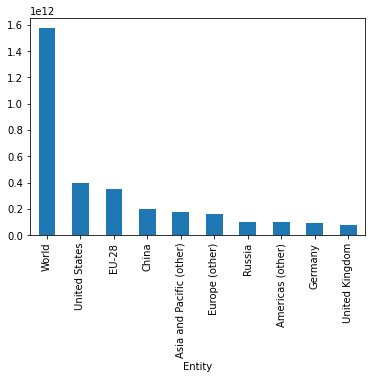

In [15]:
totalco2_countrywise.groupby("Entity").Annual_CO2_emissions_tonnes.mean().sort_values(ascending=False)[:10].plot.bar()

# Check the value of CO2 emision country wise
Check your country

In [16]:
def countrywise():
    x=totalco2_countrywise["Entity"].to_list()
    print(data['Entity'])
    country=input("select your country from above list: ")
    if country in x:
        print(country, 'has generated',
              totalco2_countrywise.loc[totalco2_countrywise['Entity'] == country, 'Annual_CO2_emissions_tonnes'].item(), 'tonnes of CO2')  

In [17]:
countrywise()

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
20848       Zimbabwe
20849       Zimbabwe
20850       Zimbabwe
20851       Zimbabwe
20852       Zimbabwe
Name: Entity, Length: 20813, dtype: object


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

**Highest to lowest CO2 generators**

In [18]:
totalco2_countrywise.groupby("Entity").Annual_CO2_emissions_tonnes.mean().sort_values(ascending=False)

Entity
World                       1.575244e+12
United States               3.993783e+11
EU-28                       3.528583e+11
China                       2.001365e+11
Asia and Pacific (other)    1.780573e+11
                                ...     
Saint Helena                3.463088e+05
Niue                        2.715786e+05
Tuvalu                      2.569226e+05
Antarctic Fisheries         1.538880e+05
Kyrgysztan                  0.000000e+00
Name: Annual_CO2_emissions_tonnes, Length: 233, dtype: float64